In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# путь к папке с датасетом
resources_path = os.path.join(os.getcwd(), 'resources/names/')

def read_data(years):
    data = []
    
    for year in years:
        file = f'{resources_path}yob{year}.txt'
        read_data = pd.read_csv(file, names=['Name', 'Sex', 'Number'])
        read_data.insert(1, 'Year', year)
        data.append(read_data)
        
    return pd.concat(data)

def ask_for_span(step=1):
    raw_years = input('Через пробел укажите года, по которым нужно провести анализ,\nлибо укажите диапазон через дефис.\n\n')
    if '-' in raw_years:
        custom_step = input('Укажите шаг между годами (по умолчанию 1).\n\n')
        if custom_step:
            step = int(custom_step)
        start, end = [int(year) for year in raw_years.split('-')]
        years = [year for year in range(start, end + 1, step)]
    else:
        years = [int(year) for year in raw_years.split()]
    return years

## Задача 1

#### Построить график изменения количества имен Ruth и Robert с 1900 по 2000.


In [2]:
name1 = 'Robert'
name2 = 'Ruth'

# чтение датасета
df = read_data(ask_for_span())

# выборка по именам name1 и name2, где name1 мужское имя, а name2 женское, объединение датафреймов
df = pd.concat([df[(df['Name'] == name1) & (df['Sex'] == 'M')], df[(df['Name'] == name2) & (df['Sex'] == 'F')]])
# очистка датафрейма от лишнего столбца, индексация по году, группировка по году и имени с расчетом суммы
df = df.drop(['Sex'], 1).set_index('Year').groupby(['Year', 'Name']).sum()
# развертка индекса 'Name' в столбцы
df = df.pivot_table(index='Year', columns='Name', values='Number')

Через пробел укажите года, по которым нужно провести анализ,
либо укажите диапазон через дефис.

1900-2000
Укажите шаг между годами (по умолчанию 1).




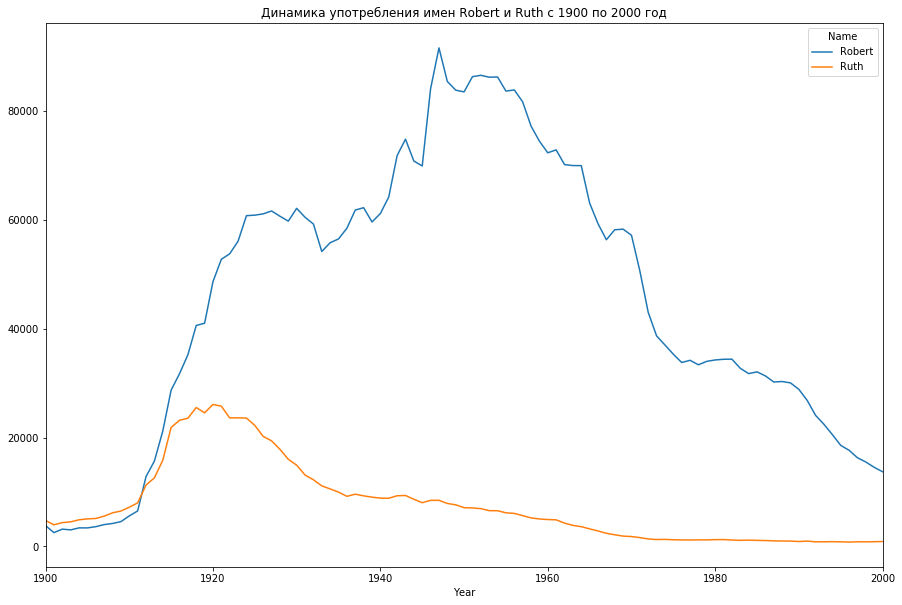

In [3]:
# отрисовка диаграммы
df.plot(figsize=(15, 10), title=f"Динамика употребления имен {name1} и {name2} с 1900 по 2000 год")

## Задача 2

#### Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

In [4]:
# чтение датасета
df2 = read_data(ask_for_span())

# выборка по именам name1 и name2, где name1 мужское имя, а name2 женское, объединение датафреймов
df2 = pd.concat([df2[(df2['Name'] == name1) & (df2['Sex'] == 'M')], df2[(df2['Name'] == name2) & (df2['Sex'] == 'F')]])
# очистка датафрейма от лишнего столбца, индексация по году, группировка по году и имени с расчетом суммы
df2 = df2.drop(['Sex'], 1).set_index('Year').groupby(['Year', 'Name']).sum()
# развертка индекса 'Name' в столбцы
df2 = df2.pivot_table(index='Year', columns='Name', values='Number')

Через пробел укажите года, по которым нужно провести анализ,
либо укажите диапазон через дефис.

1900-2000
Укажите шаг между годами (по умолчанию 1).

5


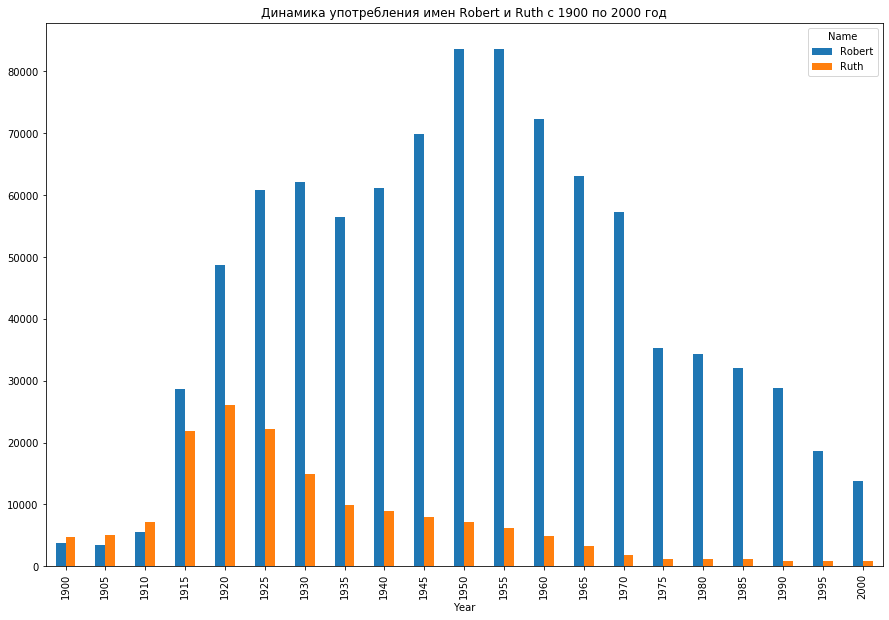

In [5]:
# отрисовка диаграммы
df2.plot(kind='bar', figsize=(15, 10), title=f"Динамика употребления имен {name1} и {name2} c 1900 по 2000 год")

## Задача 3
#### Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

In [6]:
# чтение датасета
df3 = read_data(ask_for_span())

# выборка по именам, начинающимся на букву 'R'
df3 = df3[df3['Name'].map(lambda x: x.startswith('R'))]
# группировка по столбцу 'Name' с расчетом суммы
df3 = df3.groupby('Name').sum()
# очистка датафрейма от лишнего столбца, получение 10 самых популярных имен
df3 = df3.drop('Year', 1).nlargest(10, 'Number')

Через пробел укажите года, по которым нужно провести анализ,
либо укажите диапазон через дефис.

1950


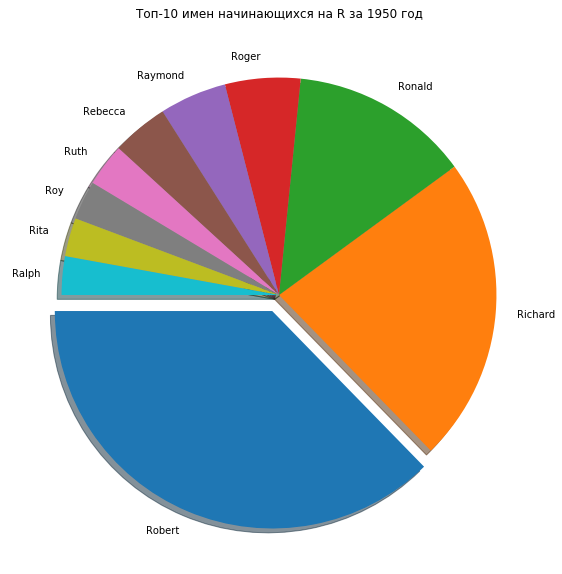

In [7]:
# подготовка и отрисовка диаграммы
plt.figure(figsize=(10, 10))
plt.title('Топ-10 имен начинающихся на R за 1950 год')
plt.pie(df3['Number'], labels=df3.index, shadow=True, explode=(0.080, 0, 0, 0, 0, 0, 0, 0, 0, 0), startangle=180)
plt.show()

## Задача 4
#### Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [8]:
# чтение датасета, подготовка переменной с гласными буквами
df4 = read_data(ask_for_span())
vowels = 'aeiou'

# группировка датафрейма по имени без создания нового индекса, расчет суммы, очистка от лишнего столбца
df4 = df4.groupby('Name', as_index=False).sum().drop('Year', 1)
# добавление нового столбца с количеством согласных букв в каждом имени
df4['Consonants'] = df4.apply(lambda x: len([letter for letter in x['Name'] if letter.lower() not in vowels]), axis=1)

Через пробел укажите года, по которым нужно провести анализ,
либо укажите диапазон через дефис.

1900-2000
Укажите шаг между годами (по умолчанию 1).




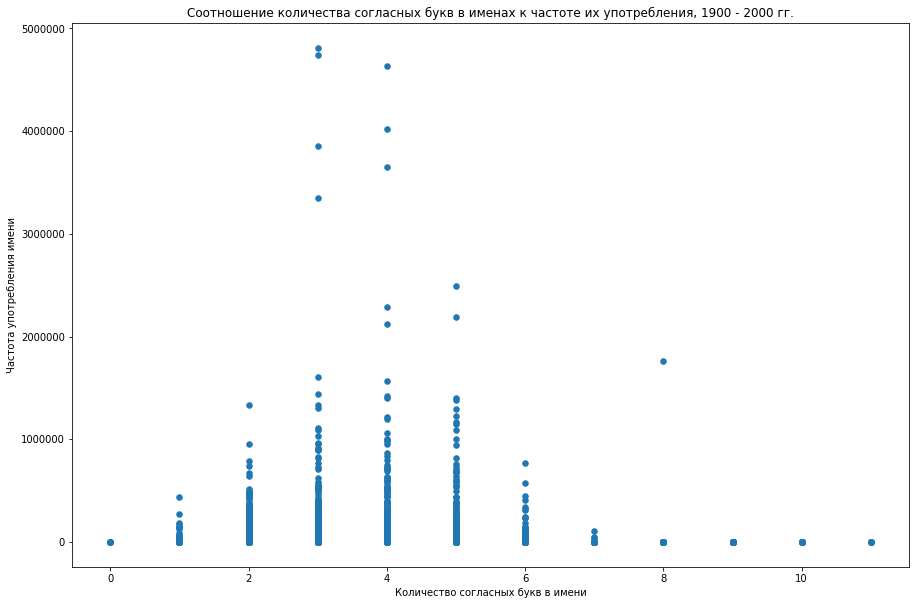

In [14]:
# подготовка и отрисовка диаграммы
plt.figure(figsize=(15, 10))
plt.xlabel('Количество согласных букв в имени')
plt.ylabel('Частота употребления имени')
plt.title('Соотношение количества согласных букв в именах к частоте их употребления, 1900 - 2000 гг.')
plt.scatter(x='Consonants', y='Number', data=df4, s=30)